In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

## 3교시 : 양자 회로의 실행과 백엔드

이번 3교시 코딩 실습은 양자회로를 실행할 수 있는 백엔드들의 종류와 사용법을 알아보도록 하겠습니다.

### 3-1. 양자 회로의 실행

우선 실행의 대상이 될 다음과 같은 양자 회로를 작성해 봅시다.

<img src="img/ex7.png" width=800/>


In [3]:
from qiskit import QuantumCircuit

# your code

qc = 

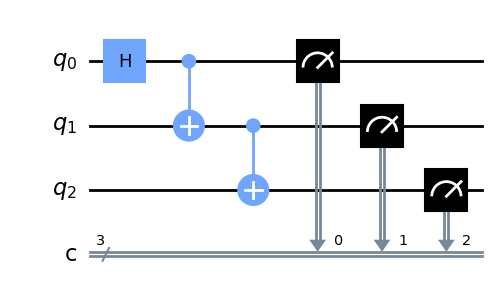

In [25]:
qc=QuantumCircuit(3,3) # 3개의 큐비트와 3개의 고전 비트를 가진 양자 회로를 만듭니다.
qc.h(0) # 0번 큐비트에 하다마드 게이트를 적용합니다.
qc.cx(0,1) # 0번 큐비트를 control 1번 큐비트에 target으로 지정해 CX 게이트를 적용합니다.
qc.cx(1,2) # 1번 큐비트를 control 2번 큐비트에 target으로 지정해 CX 게이트를 적용합니다.
qc.measure([0,1,2],[0,1,2]) # 0,1,2번 큐비트를 0,1,2번 고전 비트에 측정합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

### BasicAer Simulators를 사용해 보기

Qiskit 0.2는 여러가지 형태의 시뮬레이터를 제공합니다. 그중 BasicAer 시뮬레이터는 Python 코드를 기반으로 작성된 시뮬레이터 이며 이를 호출하는 방법과 사용할 수 있는 시뮬레이터의 종류를 확인해 봅시다.


In [26]:
from qiskit import BasicAer
print(BasicAer.backends())

[<QasmSimulatorPy('qasm_simulator')>, <StatevectorSimulatorPy('statevector_simulator')>, <UnitarySimulatorPy('unitary_simulator')>]


위에서 만들어둔 양자회로를 BasicAer의 "qasm_simulator"를 사용해서 1000번 실행해 봅시다. 계산 결과를 받아 측정된 값들의 각각의 count를 그려 봅시다.

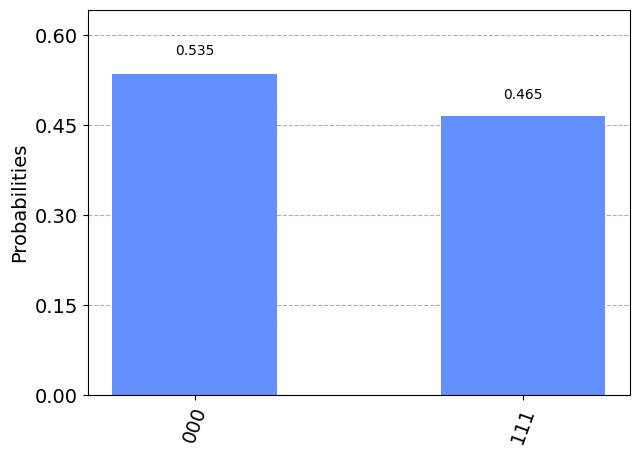

In [29]:
from qiskit import transpile
from qiskit.visualization.array import array_to_latex
from qiskit.visualization import plot_histogram, plot_circuit_layout # plot_histogram과 plot_circuit_layout 라이브러리를 불러옵니다.


backend = BasicAer.get_backend("qasm_simulator")
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc)
plot_histogram(counts)

BasicAer의 시뮬레이터 중 양자 회로가 만들어 내는 큐비트의 Statevector를 사용해서 이 회로를 시뮬레이션 해 봅시다.

In [30]:
backend = BasicAer.get_backend("statevector_simulator")
tqc = transpile(qc, backend)
job = backend.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [31]:
qc.remove_final_measurements()
tqc = transpile(qc, backend)
job = backend.run(tqc)
result = job.result()
statevector = result.get_statevector(tqc, 4)
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [32]:

backend = BasicAer.get_backend("unitary_simulator")
tqc = transpile(qc, backend)
job = backend.run(tqc)
result = job.result()
unitary = result.get_unitary(tqc, 4)
array_to_latex(unitary)

<IPython.core.display.Latex object>

### Aer Simulators 사용하기

Qiskit 0.2버젼이 제공하는 시뮬레이터 중 Aer는  C++기반으로 작성되어 BasicAer보다 조금 더 빠른 성능을 지는 시뮬레이터 군을 지니고 있습니다. Aer로 사용할 수 있는 시뮬레이터의 종류 들을 확인해 봅시다.


In [34]:
from qiskit import Aer

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

aer_simulator를 사용해서 위의 BasicAer 시뮬레이터한 것과 같은 과정을 한번 거쳐 봅시다. 실습의 대상이 될 양자 회로를 한번 만들어 봅시다.
실습을 내용을 위해 인호님의 [세번째 강의 노트북](https://github.com/QuantumComputingKorea/Qiskit-Dev-Cert-lectures/blob/main/Lecture3/Lecture%203%20-%20%EC%96%91%EC%9E%90%20%ED%9A%8C%EB%A1%9C%20%EC%8B%A4%ED%96%89%EA%B3%BC%20%EB%B0%B1%EC%97%94%EB%93%9C.ipynb)와 Qiskit Pocketbook의 [Using_the_Aer_Simulators](https://github.com/qiskit-community/qiskit-pocket-guide/blob/main/chapter02_Running_Quantum_Circuits/chapter02-2_Using_the_Aer_Simulators.ipynb) 부분을 참고해 보세요.

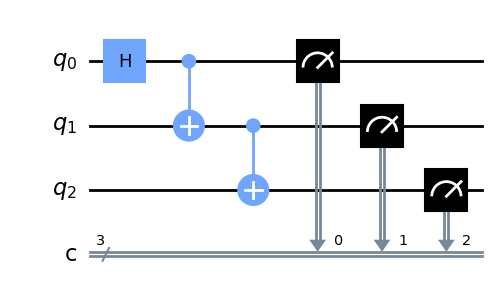

In [35]:
qc=QuantumCircuit(3,3) 
qc.h(0) 
qc.cx(0,1)
qc.cx(1,2)

qc.measure([0,1,2],[0,1,2])
qc.draw(output='mpl') 

In [ ]:
# backend = Aer.get_backend("aer_simulator") 를 사용해 위의 양자 회로를 실행하고 count를 plot_histogram()을 사용해 그려 보세요.



In [ ]:
#qc에서 measurement를 제거한 후 qc.save_statevector() 명령어를 실행해 statevector를 계산할 지점을 설정한 후  
#backend = Aer.get_backend("aer_simulator")를 사용해 statevector를  계산해 보세요




In [ ]:
#measurement가 제거된 qc에  qc.save_unitary()명령어를 실행해 unitary를 계산할 지점을 설정한 후  
#backend = Aer.get_backend("aer_simulator")를 사용해 unitary를  계산해 보세요



Aer 시뮬레이터는 실제 양자 백엔드의 노이즈 특성을 추가할 수 있으며, 다음과 같은 방식으로 추가할 수 있습니다.


In [49]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.providers.aer.noise import  NoiseModel, depolarizing_error

err_1 = depolarizing_error(0.05, 1)
err_2 = depolarizing_error(0.1, 2)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(err_1,
                           ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(err_2,
                                       ['cx'])


In [51]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

backend = Aer.get_backend("aer_simulator")

#noise model을 적용해서 회로를 실행하고 plot_histogram을 사용해 counts를 그려 보세요.



### FakeBackend와 Transpile

Qiskit은 클라우드에 서비스 되는 실제 양자 백엔드의 노이즈 특성을 비롯한 여러가지 특성을 모사해둔 특별한 시뮬레이터를 또한 제공합니다. 이 시뮬레이터 들은 실제 백엔드의 basis gate의 종류나, 연결성 정보를 모두 지니고 있기 때문에, transpile이라는, 양자 회로를 리얼 백엔드에 실행하기 위해 변환해 주는 기능을 시험해 보기 아주 좋은 도구입니다. 

In [60]:
from qiskit.compiler import transpile, assemble # transpile과 assemble 라이브러리를 불러옵니다.

In [59]:
#from qiskit.test.mock import FakeProvider # FakeProvider 라이브러리를 불러옵니다.
from qiskit.providers.fake_provider import FakeProvider
FakeProvider().backends()

[<FakeAlmaden('fake_almaden')>,
 <FakeArmonk('fake_armonk')>,
 <FakeAthens('fake_athens')>,
 <FakeBelem('fake_belem')>,
 <FakeBoeblingen('fake_boeblingen')>,
 <FakeBogota('fake_bogota')>,
 <FakeBrooklyn('fake_brooklyn')>,
 <FakeBurlington('fake_burlington')>,
 <FakeCairo('fake_cairo')>,
 <FakeCambridge('fake_cambridge')>,
 <FakeCambridgeAlternativeBasis('fake_cambridge')>,
 <FakeCasablanca('fake_casablanca')>,
 <FakeEssex('fake_essex')>,
 <FakeGuadalupe('fake_guadalupe')>,
 <FakeHanoi('fake_hanoi')>,
 <FakeJakarta('fake_jakarta')>,
 <FakeJohannesburg('fake_johannesburg')>,
 <FakeKolkata('fake_kolkata')>,
 <FakeLagos('fake_lagos')>,
 <FakeLima('fake_lima')>,
 <FakeLondon('fake_london')>,
 <FakeManila('fake_manila')>,
 <FakeManhattan('fake_manhattan')>,
 <FakeMelbourne('fake_melbourne')>,
 <FakeMontreal('fake_montreal')>,
 <FakeMumbai('fake_mumbai')>,
 <FakeNairobi('fake_nairobi')>,
 <FakeOpenPulse2Q('fake_openpulse_2q')>,
 <FakeOpenPulse3Q('fake_openpulse_3q')>,
 <FakeOurense('fake_oure

In [68]:
from qiskit.visualization import plot_gate_map
from qiskit.providers.fake_provider import FakeVigo, FakeValencia


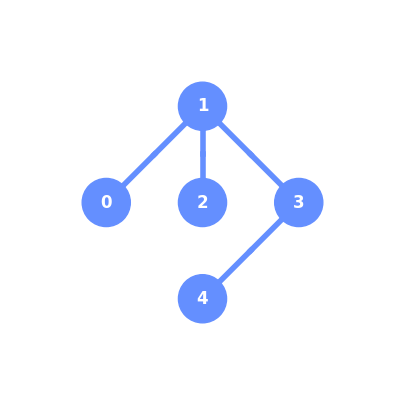

In [70]:
plot_gate_map(FakeValencia())

In [ ]:
# FakeVigo의 gate map을 그려 보세요



각 FakeBackend의 특성 들을 탐색해 봅시다. [이 문서](https://docs.quantum.ibm.com/api/qiskit/qiskit.providers.models.BackendConfiguration)를 참고해서 FakeVigo의 각각의 특성을 탐색해 봅시다.

In [79]:
conf = FakeVigo().configuration()

In [82]:
# 각종 특성을 탐색해 보세요



### transpile

이 양자 백엔드에 양자 회로를 실행하면서 좋은 성능을 얻기 위해, 사용자가 직접 설정할수있는 tranpile 옵션이 여러가지 있습니다. 우선 다음 백엔드의 특성을 살펴 봅시다.


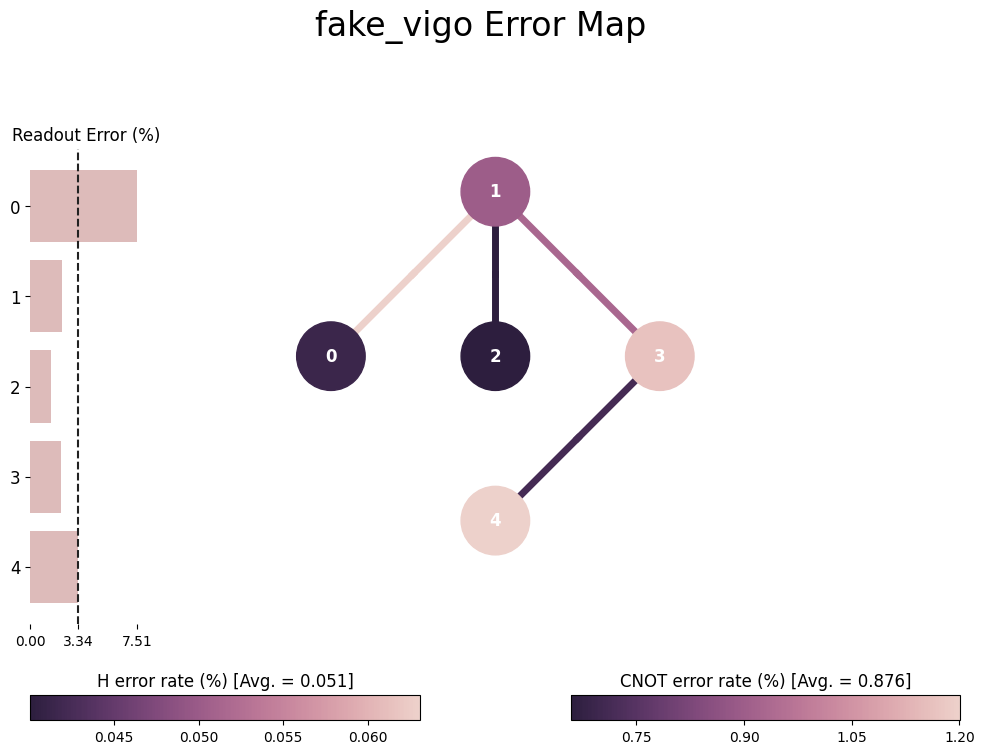

In [83]:
from qiskit.visualization import plot_error_map
plot_error_map(FakeVigo())


Transpiler의 기능 중, 양자 회로의 큐비트를 물리적 큐비트에 매핑하는 기능을 사용해 더 나은 실행결과를 얻어 봅시다. 세개의 큐비트를 사용하는 다음의 대상 회로를 만들어 봅시다.

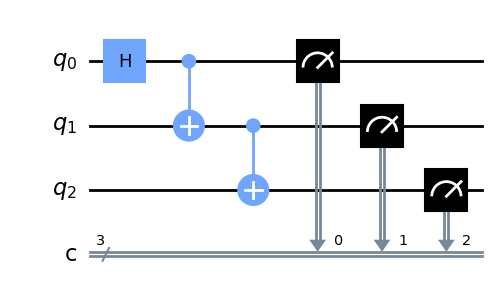

In [84]:
qc=QuantumCircuit(3,3) # 3개의 큐비트와 3개의 고전 비트를 가진 양자 회로를 만듭니다.
qc.h(0) # 0번 큐비트에 하다마드 게이트를 적용합니다.
qc.cx(0,1) # 0번 큐비트를 control 1번 큐비트에 target으로 지정해 CX 게이트를 적용합니다.
qc.cx(1,2) # 1번 큐비트를 control 2번 큐비트에 target으로 지정해 CX 게이트를 적용합니다.
qc.measure([0,1,2],[0,1,2]) # 0,1,2번 큐비트를 0,1,2번 고전 비트에 측정합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다

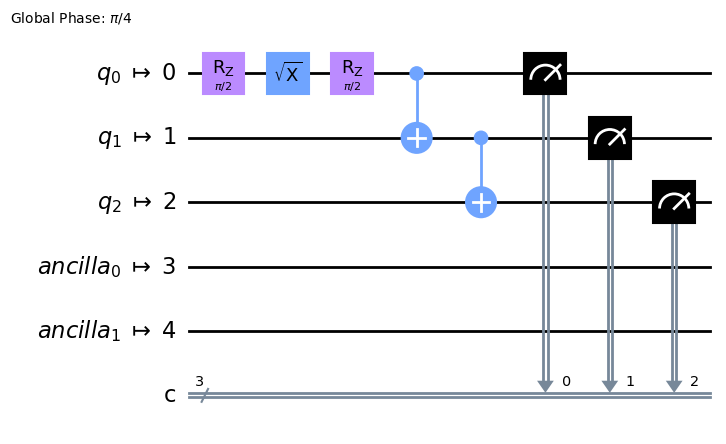

In [86]:

backend = FakeVigo()
transpile_circuit = transpile(qc,backend) #backend에 맞게 qc 양자 회로를 transpile합니다.
transpile_circuit.draw(output="mpl") # transpile한 qc 양자 회로를 그립니다.

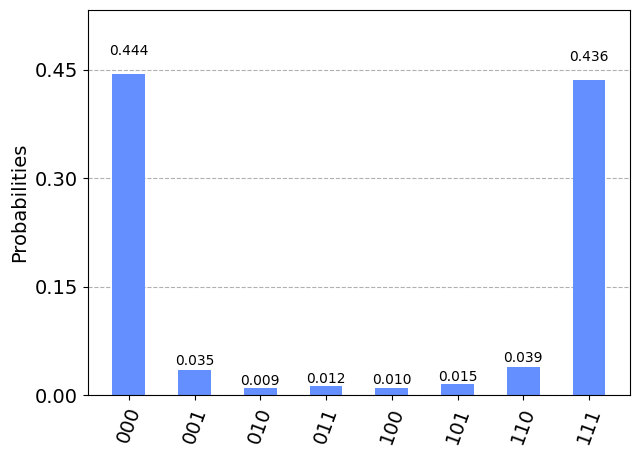

In [88]:
job = backend.run(transpile_circuit, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

transpiler를 사용해서 논리적 큐비트를 물리적 큐비트에 매핑하기 위해서는 `initial_layout`값을 설정해 줄 수 있습니다. 아래의 코드에 강제로 논리적 큐비트 0,1,2를 물리적 큐비트 0, 1,3에 매핑 한 후 plot_histogram을 그려봅시다.

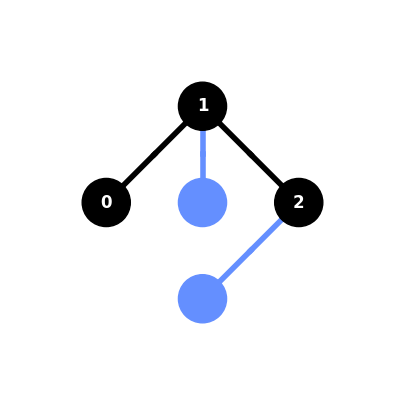

In [91]:
transpile_circuit = transpile(qc,backend, initial_layout=[0, 1,3]) #backend에 맞게 qc 양자 회로를 transpile합니다.
plot_circuit_layout(transpile_circuit, backend)


transpile된 회로를 실행해서 counts를 plot_histogram으로 그려 봅시다.

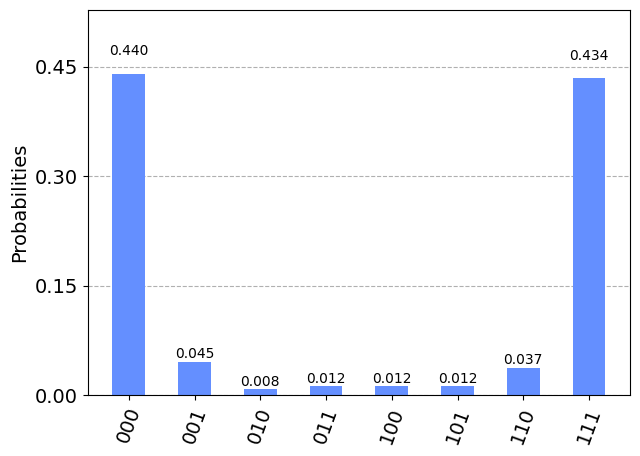

In [92]:
job = backend.run(transpile_circuit, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

 transpiler는 transpile 수준을 0부터 3까지 제공합니다. 새로운 테스트용 회로를 사용해 각각의 레벨로 주어진 회로를 transpile한 후 결과를 그려 봅시다.

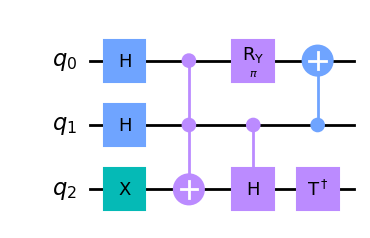

In [96]:
from math import pi

qc_trans=QuantumCircuit(3)
qc_trans.h(range(2))
qc_trans.x(2)
qc_trans.ccx(0,1,2)
qc_trans.ry(pi,0)
qc_trans.ch(1,2)
qc_trans.tdg(2)
qc_trans.cx(1,0)
qc_trans.draw(output='mpl')

In [ ]:
#optimization_level = 0으로 회로를 transpile 한 후 회로를 그려보세요
transpile_circuit_0 = 
transpile_circuit_0.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

In [ ]:
#optimization_level = 1으로 회로를 transpile 한 후 회로를 그려보세요
transpile_circuit_1 = 
transpile_circuit_1.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

In [ ]:
#optimization_level = 2으로 회로를 transpile 한 후 회로를 그려보세요
transpile_circuit_2 = 
transpile_circuit_2.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

In [ ]:
#optimization_level = 3으로 회로를 transpile 한 후 회로를 그려보세요
transpile_circuit_3 = 
transpile_circuit_3.draw(output="mpl") # 트랜스파일한 qc_trans 양자 회로를 그립니다.

In [ ]:
# 각각의 최적화 수준으로 transpile된 회로들의 depth와 size를 비교해 보세요.



### 실제 백엔드를 사용하는 방법

실제 백엔드를 사용하기 위해서는 적절한 provider와 백엔드를 불러오는 것으로, 나머지 실행 과정은 위와 동일합니다. Provider를 설정해 봅시다.

In [99]:
from qiskit import IBMQ

IBMQ.save_account("your token", overwrite=True) #TOKEN은 qiskit ibmq 홈페이지 로그인 후 받을 수 있음
#IBMQ.load_account()

ibmq_account = IBMQ.load_account() # IBMQ 계정을 불러옵니다.


IBMQ에서 권한을 가지고 사용할 수 있는 공급자 (Provide) 목록을 가져와 봅시다.


In [101]:
# 



사용자의 계정이 사용할 수 있는 백엔드의 목록을 가져와 봅시다.

In [102]:
ibmq_account.backends() # ibmq_accounts에서 사용 가능한 백엔드의 목록을 불러옵니다.

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

계정에서, ibm_brisbane 백엔드를 `get_backend`를 사용해 불러와서 backend로 설정해 봅시다.

In [ ]:
backend = ibmq_account.get_backend('ibm_brisbane')
backend

get_backend를 사용하지 않고 ibmq_accout.backend.backend_name 의 형태로 다시한번 ibm_brisbane을 불러와 봅시다.

In [104]:
backend = ibmq_account.backend.ibm_brisbane
backend

<IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>

ibmq_provider에서 qubit의 수가 100이상인 백엔드의 목록만 가져와 봅시다.


In [106]:
ibmq_account.backends(filters=lambda b: b.configuration().n_qubits > 100)


[<IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

provider로 사용 가능한 백엔드 중 시뮬레이터를 제외하고 실제 양자 장치만 찾기



In [107]:
ibmq_provider = IBMQ.get_provider(hub='ibm-q') # ibm-q hub를 불러옵니다.

In [109]:
# 



사용 가능한 백엔드 중 시뮬레이터만 찾기

In [110]:
#


실제 양자 장치중에서 가장 대기열이 낮은 백엔드 찾기


In [111]:
#
